In [1]:
# Simple XOR learning with keras 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

Using TensorFlow backend.
/home/quangnh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/quangnh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/quangnh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/quangnh/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

history = model.fit(X, y, 
          # show_accuracy=True, 
          batch_size=1, nb_epoch=100)
print(model.predict_proba(X))

/home/quangnh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/100
4/4 [==============================] - 0s 44ms/step - loss: 0.7995
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7831
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7695
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7653
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7595
Epoch 6/100
4/4 [==============================] - 0s 970us/step - loss: 0.7554
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7489
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7488
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7448
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7444
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7426
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7387
Epoch 13/100
4/4 [==============================] - 0s 2ms

In [3]:
print(model.predict_proba(X))

[[0.23982076]
 [0.5939814 ]
 [0.6863602 ]
 [0.48502702]]


dict_keys(['loss'])


Text(0.5, 1.0, 'Training Loss')

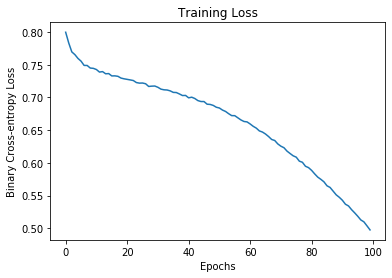

In [4]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-entropy Loss")
plt.title("Training Loss")

In [12]:
weights, biases = model.layers[0].get_weights()
print("weights: ", weights.shape, " \n ", weights)
print("biases: ", biases.shape, " \n ", biases)

weights:  (2, 8)  
  [[ 0.40937418  0.37128502 -0.7013381   1.6919818   0.6661926  -0.42658675
   0.45498863  0.16573422]
 [ 0.13255742  0.14807361 -0.0752093   1.8014925  -1.2337043  -0.35149896
   0.31361547  0.16195934]]
biases:  (8,)  
  [-0.08857431 -0.08332935  0.21084446 -0.3893449  -0.46054932  0.29048094
 -0.01916263 -0.06491029]
